# 붓스트랩

앞 절에서 우리는 추정량의 정확도를 확률적 언어로 제시하는 방법과 이론적 근거에 대하여 학습하였다.

예를 들어 모집단의 지지율에 대한 여론조사에서 확률표본으로 얻은 표본 지지율, 즉  추정량의 정확성은 다음과 같이 확률적인 언어로 정보의 크기와 그 정확성을 제시하였다.

1. *모집단에 대한 정보* : 1000명의 표본에서 45.5%의 지지율을 보였다.
2. *추정량의 정확성* : 표본 오차는 95% 신뢰수준에 ±3.1%포인트다. 

앞 절에서 표본 오차를 설명하기 위하여 가상의 모집단에서 모의실험을 통하여 많은 수의 표본을 추출하고 각 표본에 대한 추정치들을 이용하여 표본 오차를 구한 것에 유의하자. 실제로 표본을 추출하는 경우 모집단은 알 수 없으며 표본은 단 한번만 추출한다. 이러한 경우 모집단에서 모의실험을 통해 표본을 여러 번 추출하는 것은 불가능하다. 

이 절에서는 한 개의 표본을 추출하는 경우 표본 오차를 구하는 방법을 설명하고자 한다. 한 개의 표본만 추출해도 표본 오차를 구하는 간단하고 유용한 방법이 있으며 이 방법을 붓스트랩(bootstrap)이라고 한다. 

In [112]:
 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 다시 시작 및 모두 실행 선택. (출처: https://teddylee777.github.io/colab/colab-korean)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
# 그림 그리기를 위한 코드와 한글 실행
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams["figure.figsize"] = (8,8)   # 그림 크기 조정

In [2]:
import pandas as pd
import numpy as np

## 추정량의 표준편차

모집단의 관심 있는 특성, 즉 모수를 $\theta$ 라고 하면 추정량은 표본으로 부터 얻은 통계량이다. 확률표본의 임의성(randomness)때문에 추정량은 확률분포를 가진다. 추정량이 확률분포를 가진다는 것은 가능한 값이 여러 개 있다는 것이며 각 값에 대한 확률이 있다는 것이다.

앞 절에서는 모집단을 알고 있는 경우 추정량의 분포를 근사하기 위하여 모집단에서 표본을 반복하여 추출하였다. 더 나아가 각 표본으로 부터 추정량의 값을 구할 수 있다. 만약 모의실험의 횟수가 B 라고 하면 우리는 B개의 추정량들을 구할 수 있다.

$$ \hat \theta_1, \hat \theta_2, \dots, \hat \theta_B $$

위에서 표본의 크기가 커지면 모의실험으로 구한 B개의 추정량들의 분포가  정규분포와 가까워진다. 이 사실은 중심극한 정리에 의한 결과이다. 또한 B개의 추정량들의 평균은 모수와 매우 가깝게 나타난다.

$$ \bar \theta = \frac{\sum_{i=1}^B \hat \theta_i}{B} \approx \theta $$



또한 B개의 **추정량들의 표준편차를 SD 라고 하면**

$$ SD = SD(\hat \theta) = \sqrt{\frac{\sum_{i=1}^B (\hat \theta_i - \bar \theta)^2}{B-1}} $$

다음과 같은 확률적 표현이 가능하다.

    95%의 확률로 추정량과 모수의 차이는 ± 2SD 이내이다.

즉,

$$ P( \theta -2SD \le \hat \theta \le \theta+ 2SD ) \approx 0.95 $$

또는 위의 식을 다르게 표현하면 다음과 같다.

$$ P( | \hat \theta -\theta| \le 2SD ) \approx 0.95 $$

    그런데 문제는 실제 표본을 추출하는 경우 우리는 한 개의 표본만 추출하며 따라서 우리가 얻을수 있는 추정량의 값은 1개 밖에 없다. 

이런 실제 상황에서 추정량의 표준편차 SD를 어떻게 구할까??? 만약 여론조사에서 1000명으로 구성된 하나의 표본을 추출하고 표본 지지율 35%를 얻었다면 SD 를 구할 방법이 없을 것 같다. 왜냐하면 1개의 값으로는 표준편차를 구할 수 없기 때문이다.

$$ \hat \theta = 0.35 \rightarrow SD? $$


## 붓스트랩

**붓스트랩(bootstrap)** 은 하나의 표본으로 부터 추정량의 경험적 분포를 근사적으로 구할 수 있는 방법이다. 붓스트랩은 통계학에서 발견한 획기적인 방법 중의 하나로서 컴퓨터를 이용한 모의실험(simulation)을 이용한다.

붓스트랩 방법의 아이디어는 다음과 같이 매우 간단하다. 

    표본을 모집단처럼 이용하자!! 

위에서 우리가 모집단을 알고 있을 때 어떻게 추정량의 분포를 모의실험을 통하여 근사적으로 구하는지 다시 생각해 보자. 다음과 그림과 같이 우리는 모집단에서 많은 수의 표본들을 반복적으로 추출하여 여러 개의 추정치를 구하는 모의실험을 수행해 보았다.

![모집단을 이용한 모의실험](../../images/bootstrap1.png)

이제 한 개의 표본이 있다고 하자. **한 개의 표본을 모집단이라고 생각하고** 표본에서 많은 수의 표본들을 다시 **재추출(resampling)** 하여 여러 개의 추정치를 구하는 방법이 붓스트랩이다.

![붓스트랩](../../images/bootstrap2.png)

여기서 유의해야 할 점은 표본에서 **표본을 재추출하는 경우 복원추출** 을 사용해야 한다는 것이다. 즉, 재추출은 $n$개의 표본에서 $n$개를 복원추출하는 방법이다.

붓스트랩 방법을 한마다로 요약하면 표본에서 표본을 재추출하는 방법이다.


이제 앞 장에서 고려한 지지율을 추정하는 여론 조사에 대하여 붓스트랩 방법을 이용하여 표본 지지율의 경험적 분포를 근사적으로 구하고 추정량의 표준편차 SD를 구해보자.

먼저 모집단 `P` 을 만들자.


In [115]:
# 모집단의 수
N = 100000

# 모집단의 지지율
theta = 0.5

# 지지하는 유권자의 수 
favor = int(N*theta)

# 반대하는 유권자의 수 
opposite = N-favor

# 모집단 (1=지지, 0=반대)
P = np.concatenate((np.ones(favor), np.zeros(opposite)), axis=0)

이제 1000명으로 구성돤 하나의 확률표본을 추출해 보자 

In [116]:
# 표본의 수
n = 1000 

# 하나의 표본을 추츨
one_sample = np.random.choice(P, n, replace=False)

위에서 추출한 표본으로 부터 얻은 표본 지지율 $\hat \theta$ 은 다음과 같다.

In [117]:
hat_theta = np.mean(one_sample)
hat_theta

0.499

다음으로 붓스트랩을 이용하여 재표본을 반복적으로 추출하고 지지율를 구해보자. 붓스트램도 모의실험이므로 모의실험의 회수를 크게 해야 한다. 아래 코드에서 붓스트랩의 모의실험 횟수는 1000번이다 (B=1000).  

붓스트랩은 모집단에서 표본을 반복적으로 추출하는 것이 아니라 **주어진 하나의 표본에서 
표본을 반복적으로 재추출(resampling from sample)** 한다는 것이다. 

In [118]:
# 붓스트랩 모의실험의 횟수
B = 1000 

# 붓스트랩 - 표본의 재추출을 B번 반복하여 B개의 지지율(추정량)을 구한다.

## B 개의 추정치를 저장할 데이터프레임
boostrap_estimate = pd.DataFrame({'resample_estimate':np.zeros(B)})

## 붓스트랩을 위한 모의실험 : 복원추출(replace=True)에 유의
for i in np.arange(B):
  resample = np.random.choice(one_sample, n, replace=True)
  boostrap_estimate.loc[i,'resample_estimate'] = np.mean(resample)

붓스트랩을 이용하여 표본 지지율의 분포, 즉 추정량의 경험적 분포를 히스토그램으로 나타내어 보자.

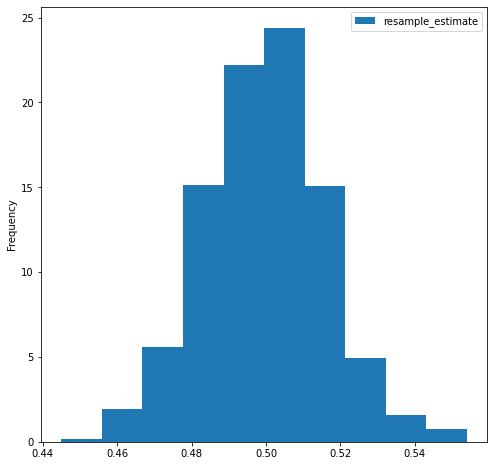

In [119]:
# 히스토그램
p= boostrap_estimate.plot.hist( density=True)


이제  붓스트랩으로 구한 1000개 지지율의 표준편차 SD를 구해보자. 

In [120]:
# 붓스트랩으로 구한 B개의 지지율의 표준편차
SD = float(boostrap_estimate.std())
SD

0.01615287300471055

앞 절에서 우리는 표본의 크기가 $n=1000$ 일 경우 지지율에 대한 이론적으로 정확한 표본 오차가 $2SD=0.0316$ 으로 주어지는 것을 배웠다. 

위에서 구한 붓스트랩을 이용한 표본 오차 $2SD$의 값이 정확한 표본오차와 매우 유사하다는 것을 알 수 있다.

In [121]:
2*SD

0.0323057460094211

## 신뢰구간

### 추정량의 경험적 분포 




붓스트랩으로 구한 1000개의 추정치, 즉 1000개의 표본 지지율의 분포를 히스토그램으로 그려보자. 
아래 주어진 히스토그램은 **붓스트랩으로 구한 추정량의 경험적 분포** (empirical distribution of estimator)이다. 


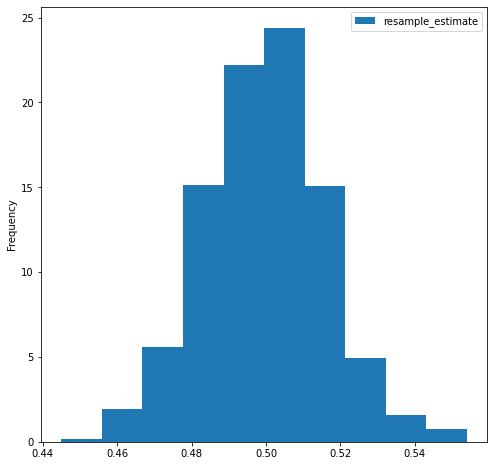

In [122]:
# 히스토그램
p= boostrap_estimate.plot.hist( density=True)

### 백분위수에 의한 신뢰구간

이제 붓스트랩으로 구한 1000개의 추정치(지지율)들을 순서대로 늘어 놓았을때 2.5%백분위수와 97.5% 백분위수를 구해보자. 우리가 1사분위수(Q1, 25%백분위수) 또는 3사분위수(Q3 75%백분위수)를 구하는 방법과 유사하게 구할 수 있다.

`pandas` 라이브러리의 `percentile` 메소드를 사용하면 2.5%와 97.5% 백분위수를 구할 수 있다.

In [123]:
lower_bound = float(boostrap_estimate.quantile(0.025))
upper_bound = float(boostrap_estimate.quantile(0.975))

(lower_bound, upper_bound)

(0.467, 0.5320250000000001)


위와 같이 2.5%백분위수 $\hat \theta_{(0.025)}$ 와 97.5% 백분위수 $\hat \theta_{(0.975)}$로 만든 구간을 **모수 $\theta$ 에 대한 95% 신뢰구간(confidence interval)** 이라고 한다. 
이때 **95%를 신뢰수준(confidence level)** 이라고 부른다.

95%의 의미는 붓스트랩을 이용하여 만든 1000개의 추정값들 중 95%, 즉 950개의 추정값이 주어진 구간 안에 있다는 것이다. 붓스트랩을 이용한 추정량의 경험적 분포를 이용하여 만든 구간이다. 


$$ \text{Confidence Interval} = (\hat \theta_{(0.025)}, \hat \theta_{(0.975)}) $$


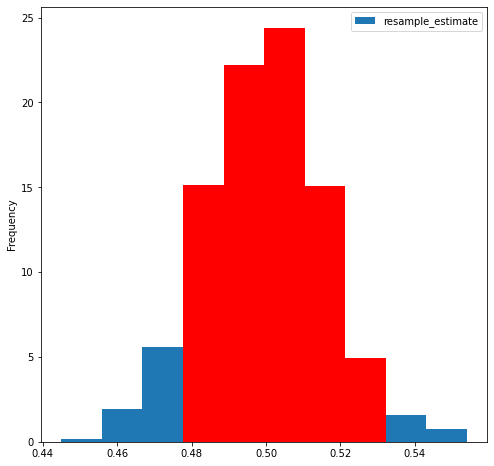

In [124]:
# 히스토그램
p= boostrap_estimate.plot.hist( density=True)

# 2.5%백분위수와 97.5% 백분위수 사이 구간은 빨간색으로 
for rectangle in p.patches:
    if rectangle.get_x() >=  lower_bound and rectangle.get_x() <=  upper_bound :
        rectangle.set_facecolor('red')

### 표준 편차에 의한 신뢰구간

우리는 95% 신뢰구간(confidence interval)을 위에서 구한 추정량의 표준 편차 SD를 이용하여 다음과 같이 구할 수 있다. 

$$ \text{Confidence Interval} = (\hat \theta -2SD, \hat \theta+ 2SD) $$

위의 주어진 구간의 죄우 값을 계산하면 다음과 같다. 

In [125]:
lower_bound_2 = hat_theta -2*SD
upper_bound_2 = hat_theta + 2*SD

(lower_bound_2, upper_bound_2)

(0.4666942539905789, 0.531305746009421)

붓스트랩의 백분위수로 구한 신뢰구간 $(\hat \theta_{(0.025)}, \hat \theta_{(0.975)}) $이 추정량의 표준 편차 SD로 구한   신뢰구간 $(\hat \theta -2SD, \hat \theta+ 2SD$)과  매우 유사함을 알 수 있다.


### 신뢰구간의 해석

신뢰구간은 표본으로부터 얻어지는 것이기 때문에 임의성을 가진다. 표본이 임의성을 가지므로 신뢰구간의 하한(lower bound)과 상한(upper bound)도 임의성을 가진다. 실제 상황에서 추정량의 값과 모수의 정확한 차이를 알 수 없듯이 표본으로 구한 특정한 신뢰구간에 대하여 구간 안에 모수가 포함되었는지 정확하게 알 수 없다. 

**95% 신뢰구간의 의미는 "임의의 구간" $(\hat \theta -2SD, \hat \theta+ 2SD)$ 이 관심있는 모수 $\theta$를 포함할 확률이 0.95라는 의미이다.**  이는 위에서 배운 중심극한 정리의 결과를 응용한 것이다. 즉

$$ P[ \theta \in (\hat \theta -2SD, \hat \theta+ 2SD) ] \approx 0.95, \quad 
\hat \theta \text{ is random} $$

신뢰구간의 신뢰수준(confidence level)이 95% 라는 의미는 여러분이 만약 모집단을 이용한 모의실험으로 100개의 신뢰구간을 구하면 그 중에 약 95개의 구간이 모수를 포함한다는 것으로 해석하면 된다. 

참고할 점은 통계학의 한 분야인 베이지안 통계(bayesian statsitics)에서는 모수도 임의성이 있다고 보기 때문에 **"여러분이 구한 특정한 신뢰구간"** 에 모수가 포함될 확률이 95% 이라고 말할 수 있다.

$$ P[ \theta \in (0.4667, 0.5313) ] \approx 0.95 $$

이러한 신뢰구간에 대한 서로 다른 해석의 차이를 여러분들이 이해하는 것은 어려운 일이다.

- 결론적으로 여러분이 구한 95% 신뢰구간에 모수가 포함되었을 가능성이 95%라고 생각해도 큰 문제는 없다. 

일반적으로 백분위수를 이용한 신뢰구간과 표준편차  SD 를 이용한 신뢰구간은 정확하게 일치하지 않는다. 
하지만 표본의 크기가 커지면 중심극한 정리에 의하여 추정량의 분포가 정규분포에 가까워지므로 백분위수를 이용한 신뢰구간과 SD를 이용한 신뢰구간은 점점 일치한다. 

$$ \hat \theta_{(0.025)} \approx \hat \theta -2SD, \quad \hat \theta_{(0.975)} \approx \hat \theta +2SD $$




## 예제: 공공 자전거

앞 절에서 다룬 공공 자전거 자료에서 이용시간과 이용거리에 대한 **중앙값(median)에 대한 신뢰구간**을 
붓스트랩 방법으로 구하는 법을 살펴보자.

먼저 자료를 데이터프레임 `bike` 에 저장한다.

In [127]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike = pd.read_csv(url1, encoding="CP949")

In [69]:
bike

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-17003,2019-09-28 16:10:55,368,SK 서린빌딩 앞,4,2019-09-28 17:03:32,2002,노들역 1번출구,14,52,8940.0
1,SPB-14405,2019-09-28 16:48:16,2024,상도역 1번출구,3,2019-09-28 17:03:44,2002,노들역 1번출구,18,15,1910.0
2,SPB-18431,2019-09-28 16:59:54,2002,노들역 1번출구,10,2019-09-28 17:03:57,2002,노들역 1번출구,10,2,30.0
3,SPB-04853,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,32,2019-09-28 17:10:12,2002,노들역 1번출구,19,98,9610.0
4,SPB-11122,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,14,2019-09-28 17:10:37,2002,노들역 1번출구,18,90,9450.0
...,...,...,...,...,...,...,...,...,...,...,...
407584,SPB-24072,2019-09-12 08:56:34,240,문래역 4번출구 앞,9,2019-09-12 09:03:37,99999,영남단말기정비,2,6,720.0
407585,SPB-16130,2019-09-18 10:13:09,99999,영남단말기정비,1,2019-09-18 11:38:30,99999,영남단말기정비,1,85,40.0
407586,SPB-03728,2019-09-25 08:00:28,2183,동방1교,7,2019-09-25 08:54:02,99999,영남단말기정비,5,53,12910.0
407587,SPB-08928,2019-09-30 07:49:27,2183,동방1교,10,2019-09-30 09:42:27,99999,영남단말기정비,7,2,0.0


이용시간과 이용거리의 열이름을 각각  `time` 과 `distance` 로 바꾸고 두 열만 포함하는 데이터프레임 `bike2`를 만들자.

In [128]:
bike2 = bike[ ["이용시간","이용거리"] ].rename(columns={"이용시간":"time", "이용거리":"distance"})

In [129]:
bike2

,time,distance
0,52,8940.0
1,15,1910.0
2,2,30.0
3,98,9610.0
4,90,9450.0
...,...,...
407584,6,720.0
407585,85,40.0
407586,53,12910.0
407587,2,0.0


In [130]:
bike2.describe()

,time,distance
count,407589.000000,407589.000000
mean,30.156827,4253.336228
std,32.065934,5782.673901
min,1.000000,0.000000
25%,8.000000,1200.000000
50%,18.000000,2380.000000
75%,43.000000,5130.000000
max,2479.000000,153490.000000


이제 1000개의 표본을 추출해 보자.

In [131]:
# 표본의 수
n = 1000 

one_sample = bike2.sample(n=n, replace=False, random_state=13312)
one_sample

,time,distance
50771,25,1830.0
179510,20,3670.0
167844,8,1180.0
244482,3,210.0
102805,9,1330.0
...,...,...
333457,10,1140.0
355981,25,7760.0
252088,50,3970.0
282282,12,1610.0


In [132]:
one_sample.describe()

,time,distance
count,1000.000000,1000.000000
mean,28.150000,3923.110000
std,28.664598,4723.684348
min,1.000000,0.000000
25%,8.000000,1247.500000
50%,18.000000,2345.000000
75%,41.000000,5040.000000
max,321.000000,70890.000000


이제 추출한 표본에서 100개의 붓스트랩 재표본 1000개를 이용하여 이용시간과 이용거리의 중간값를 만들어 보자. `numpy` 라이브러리의 `median` 함수를 사용할 것이다. 

In [133]:
# 붓스트랩 모의실험의 횟수
B = 1000 

# 붓스트랩 - 표본에서 B번 반복하여  재추출 표본을 만들고  B개의 추정값을 구한다.
bootstrap_estimates = pd.DataFrame({'time_boot':np.zeros(B), 'distance_boot':np.zeros(B)})

for i in np.arange(B):
  boot_sample = one_sample.sample(n=n, replace=True, random_state=i)
  bootstrap_estimates.loc[i,'time_boot'] = np.median(boot_sample.time)
  bootstrap_estimates.loc[i,'distance_boot'] = np.mean(boot_sample.distance)

bootstrap_estimates 

,time_boot,distance_boot
0,18.0,4184.59
1,17.0,3849.55
2,18.0,4031.78
3,18.0,4157.10
4,19.0,3966.78
...,...,...
995,17.5,3884.88
996,19.0,3935.96
997,19.0,3819.56
998,17.0,3639.65


1000개의 붓스트랩 재표본으로 부터 구한 이용시간과 이용거리의 중간값들의 분포를 히스토그램으로 그려보자.

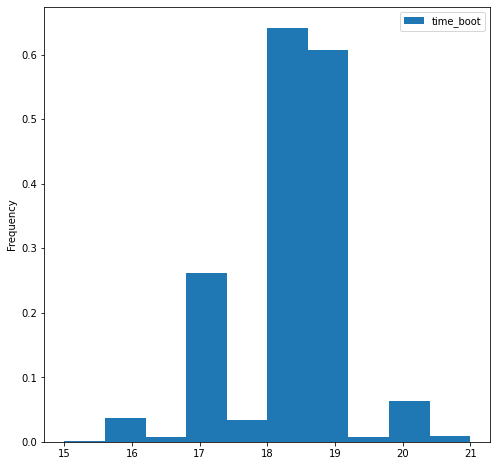

In [134]:
bootstrap_estimates[["time_boot"]].plot.hist( density=True)

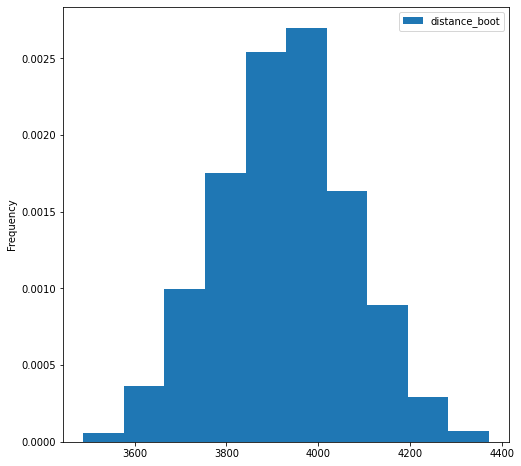

In [135]:
p= bootstrap_estimates[["distance_boot"]].plot.hist( density=True)
p

붓스트랩 재표본의 백분위수를 이용하여 모집단 이용시간 중간값에 대한  95% 신뢰구간을 구하면 다음과 같다. 

In [136]:
lower_bound = float(bootstrap_estimates[["time_boot"]].quantile(0.025))
upper_bound = float(bootstrap_estimates[["time_boot"]].quantile(0.975))

(lower_bound, upper_bound)

(16.5, 20.0)

붓스트랩 재표본의 백분위수를 이용하여 모집단 이용거리 중간값에 대한  95% 신뢰구간을 구하면 다음과 같다. 

In [137]:
lower_bound = float(bootstrap_estimates[["distance_boot"]].quantile(0.025))
upper_bound = float(bootstrap_estimates[["distance_boot"]].quantile(0.975))

(lower_bound, upper_bound)

(3643.26675, 4227.87525)

## 특별한 추정량: 표본 평균


통계 이론에 의하면 다음과 같이 추정량의 형태가 특별한 경우 추정량의 표준편차 SD 를 붓스트랩 방법을 이용하지 않고 구할 수 있다.

만약 표본 $S$ 에 포함된 $n$ 개의 값들을 $x_1, x_2, \dots, x_n$이라고 하면 표본 평균(sample mean) 은 다음과 같다.

$$ \bar x =\frac{\sum_{i=1}^n x_i}{n} $$

만약 **관심있는 모수 $\theta$ 가 모집단의 평균이라면 추정량은 표본 평균** $\hat \theta = \bar x$ 이며 표본 평균의 SD를 다음과 같이 직접 구할 수 있다. 

$$ SD(\bar x) \approx \frac{\text{표본의 표준편차}}{\sqrt{n}} $$

위에서 **표본의 표준편차** 는 표본에 속한 값들의 표준편차이다. 

$$ \text{표본의 표준편차} = \sqrt{ \frac{\sum_{i=1}^n (x_i - \bar x)^2}{n-1}} $$